# **Text Mining Assignment**

# **Assignment 11(b)**

# **Amazon_Review Dataset(Amazon_review data.xlsx)**

# **Importing Libararies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud

# **Importing Dataset**

In [2]:
import pandas as pd
amazon=pd.read_excel('Amazon_review data.xlsx')
amazon

Unnamed: 0  reviews.rating                            reviews.title  \
0              0               5                                   Kindle   
1              1               5                                very fast   
2              2               5  Beginner tablet for our 9 year old son.   
3              3               4                                  Good!!!   
4              4               5                Fantastic Tablet for kids   
...          ...             ...                                      ...   
2496        2496               5                Good tablet for the price   
2497        2497               2           Watching videos, great..then..   
2498        2498               5                             Great tablet   
2499        2499               4            Bought for Senior and Preteen   
2500        2500               5                            Great upgrade   

                                           reviews.text  
0     This product so far has not disappointed. My c...  
1     great for beginner or experienced person. Boug...  
2     Inexpensive tablet for him to use and learn on...  
3     I've had my Fire HD 8 two weeks now and I love...  
4     I bought this for my grand daughter when she c...  
...                                                 ...  
2496  This little $60 tablet is really good for read...  
2497  My Hulu plays perfectly..great volume. Kindle ...  
2498  Nice size screen, clear and clean picture with...  
2499  I bought two of these kindles. One for my pret...  
2500  This replaced my old original kindle fire. Wha...  

[2501 rows x 4 columns]

# **Exploratory Data Analysis**

In [3]:
amazon_df=amazon.copy()

In [4]:
#droping all columns and keeping only Review column
amazon.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
amazon.head()

reviews.rating                            reviews.title  \
0               5                                   Kindle   
1               5                                very fast   
2               5  Beginner tablet for our 9 year old son.   
3               4                                  Good!!!   
4               5                Fantastic Tablet for kids   

                                        reviews.text  
0  This product so far has not disappointed. My c...  
1  great for beginner or experienced person. Boug...  
2  Inexpensive tablet for him to use and learn on...  
3  I've had my Fire HD 8 two weeks now and I love...  
4  I bought this for my grand daughter when she c...

In [6]:
#renaming the column names
amazon.rename(columns={'reviews.rating':'rating','reviews.title':'title','reviews.text':'review'},inplace=True)
amazon

rating                                    title  \
0          5                                   Kindle   
1          5                                very fast   
2          5  Beginner tablet for our 9 year old son.   
3          4                                  Good!!!   
4          5                Fantastic Tablet for kids   
...      ...                                      ...   
2496       5                Good tablet for the price   
2497       2           Watching videos, great..then..   
2498       5                             Great tablet   
2499       4            Bought for Senior and Preteen   
2500       5                            Great upgrade   

                                                 review  
0     This product so far has not disappointed. My c...  
1     great for beginner or experienced person. Boug...  
2     Inexpensive tablet for him to use and learn on...  
3     I've had my Fire HD 8 two weeks now and I love...  
4     I bought this for my grand daughter when she c...  
...                                                 ...  
2496  This little $60 tablet is really good for read...  
2497  My Hulu plays perfectly..great volume. Kindle ...  
2498  Nice size screen, clear and clean picture with...  
2499  I bought two of these kindles. One for my pret...  
2500  This replaced my old original kindle fire. Wha...  

[2501 rows x 3 columns]

In [7]:
amazon.shape

(2501, 3)

In [8]:
#checking null values
amazon.isna().sum()

rating    0
title     0
review    0
dtype: int64

In [9]:
#checking duplicates
amazon.duplicated().sum()

0

In [10]:
#describe
amazon.describe()

rating
count  2501.000000
mean      4.592163
std       0.679413
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000

In [11]:
#info
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  2501 non-null   int64 
 1   title   2501 non-null   object
 2   review  2501 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.7+ KB


In [12]:
amazon['rating'].value_counts()

5    1670
4     708
3      77
2      26
1      20
Name: rating, dtype: int64

# **Percentage of rating**

# **CountPlot**

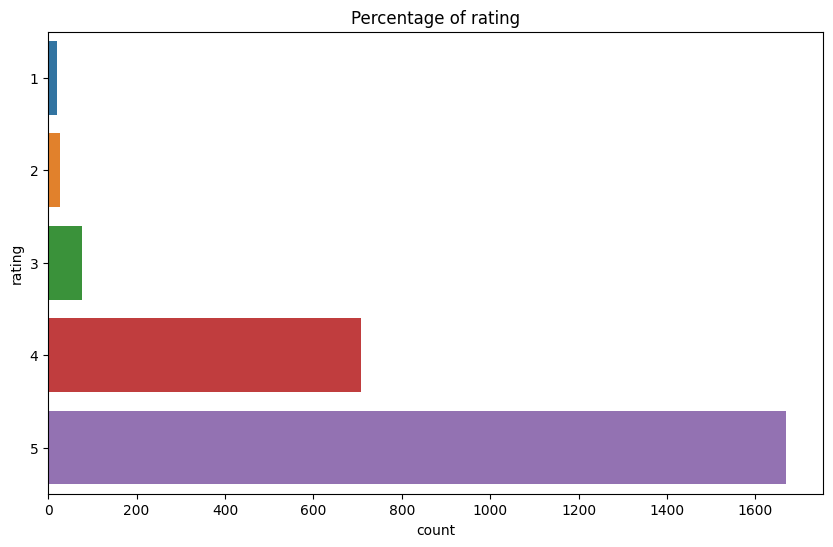

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(y='rating',data=amazon)
plt.title('Percentage of rating')
plt.show()

# **PiePlot**

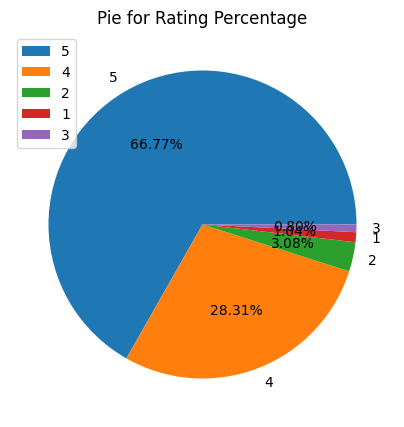

In [14]:
#pie plot
plt.figure(figsize=(5,5))
plt.pie(amazon['rating'].value_counts(),labels=amazon['rating'].unique(),autopct='%.2f%%')
plt.title('Pie for Rating Percentage')
plt.legend()
plt.show()

In [15]:
a_df=amazon.copy()
a_df.head()

rating                                    title  \
0       5                                   Kindle   
1       5                                very fast   
2       5  Beginner tablet for our 9 year old son.   
3       4                                  Good!!!   
4       5                Fantastic Tablet for kids   

                                              review  
0  This product so far has not disappointed. My c...  
1  great for beginner or experienced person. Boug...  
2  Inexpensive tablet for him to use and learn on...  
3  I've had my Fire HD 8 two weeks now and I love...  
4  I bought this for my grand daughter when she c...

In [16]:
#for further process we required only text columns
#So consider only review columns

In [17]:
amazon.drop(['rating','title'],axis=1,inplace=True)
amazon.head()

review
0  This product so far has not disappointed. My c...
1  great for beginner or experienced person. Boug...
2  Inexpensive tablet for him to use and learn on...
3  I've had my Fire HD 8 two weeks now and I love...
4  I bought this for my grand daughter when she c...

**Removing extra space from amazon dataset**

In [18]:
amazon=[review.strip() for review in amazon.review]
amazon=[review for review in amazon if review]
amazon[0:18]

['This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person. Bought as a gift and she loves it',
 'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.",
 'I bought this for my grand daughter 

**Joining all reviews , so to form one corpus**

In [19]:
text=''.join(amazon)
text

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.great for beginner or experienced person. Bought as a gift and she loves itInexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...I\'ve had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.I bought this for my grand daughter when she comes over 

**Removing Punctuation Marks**

In [20]:
no_punc=text.translate(str.maketrans('','',string.punctuation))
no_punc

'This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with easegreat for beginner or experienced person Bought as a gift and she loves itInexpensive tablet for him to use and learn on step up from the NABI He was thrilled with it learn how to Skype on it alreadyIve had my Fire HD 8 two weeks now and I love it This tablet is a great valueWe are Prime Members and that is where this tablet SHINES I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing 900 base model The build on this fire is INSANELY AWESOME running at only 77mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur handsI bought this for my grand daughter when she comes over to visit I set it u

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Preprocessing**

# **Tokenization**

In [22]:
from nltk.tokenize import word_tokenize
token=word_tokenize(no_punc)
print(token[0:22])

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what']


In [23]:
len(token)

69974

In [24]:
token_df=pd.DataFrame(token)
token_df.value_counts().head(10)

the       2475
and       2367
for       2149
to        1999
a         1858
I         1544
it        1522
is        1442
my        1077
tablet    1063
dtype: int64

**Removal of Stopwords**

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=stopwords.words('english')
stop_words.append('the')
stop_words.append('and')
stop_words.append('for')

no_stop_words=[w for w in token if not w in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
no_stop_words[0:18]

['This',
 'product',
 'far',
 'disappointed',
 'My',
 'children',
 'love',
 'use',
 'I',
 'like',
 'ability',
 'monitor',
 'control',
 'content',
 'see',
 'easegreat',
 'beginner',
 'experienced']

In [27]:
len(no_stop_words)

40100

**Normalization of data**

In [28]:
lower_case=[x.lower() for x in no_stop_words]
lower_case[0:18]

['this',
 'product',
 'far',
 'disappointed',
 'my',
 'children',
 'love',
 'use',
 'i',
 'like',
 'ability',
 'monitor',
 'control',
 'content',
 'see',
 'easegreat',
 'beginner',
 'experienced']

**Stemming**

In [29]:
#stemming convert to base dictionary word and chops the end word
from nltk.stem import PorterStemmer
ps=PorterStemmer()

stem=[ps.stem(w) for w in lower_case ]
stem[0:18]

['thi',
 'product',
 'far',
 'disappoint',
 'my',
 'children',
 'love',
 'use',
 'i',
 'like',
 'abil',
 'monitor',
 'control',
 'content',
 'see',
 'easegreat',
 'beginn',
 'experienc']

**Lemmatization**

In [30]:
! python -m spacy download en

2023-12-21 11:27:57.946242: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 11:27:57.946299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 11:27:57.947914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 11:28:00.401768: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.3 MB/s eta 0:00:00
✔ Download and installation successf

In [31]:
nlp=spacy.load('en_core_web_sm')

In [32]:
doc=nlp(' '.join(lower_case))
print(doc)

this product far disappointed my children love use i like ability monitor control content see easegreat beginner experienced person bought gift loves itinexpensive tablet use learn step nabi he thrilled learn skype alreadyive fire hd 8 two weeks i love this tablet great valuewe prime members tablet shines i love able easily access prime content well movies download watch laterthis 1280800 screen really nice look nice crisp bright infact brighter ipad pro costing 900 base model the build fire insanely awesome running 77mm thick smooth glossy feel back really amazing hold like futuristic tab ur handsi bought grand daughter comes visit i set user entered age name amazon makes sure accesses sites content appropriate age simple loves capabilities i also bought installed 64gig sd card gives little tablet plenty storage for price i think tablet best one you spend hundreds dollars additional speed capacity comes basics tablets everything people ever need fraction costthis amazon fire 8 inch ta

In [33]:
#lemmatization is use to convert words to their base dictionary words
lemmas=[x.lemma_ for x in doc]
print(lemmas)

['this', 'product', 'far', 'disappoint', 'my', 'child', 'love', 'use', 'I', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'easegreat', 'beginner', 'experience', 'person', 'buy', 'gift', 'love', 'itinexpensive', 'tablet', 'use', 'learn', 'step', 'nabi', 'he', 'thrill', 'learn', 'skype', 'alreadyive', 'fire', 'hd', '8', 'two', 'week', 'I', 'love', 'this', 'tablet', 'great', 'valuewe', 'prime', 'members', 'tablet', 'shine', 'I', 'love', 'able', 'easily', 'access', 'prime', 'content', 'well', 'movie', 'download', 'watch', 'laterthis', '1280800', 'screen', 'really', 'nice', 'look', 'nice', 'crisp', 'bright', 'infact', 'bright', 'ipad', 'pro', 'cost', '900', 'base', 'model', 'the', 'build', 'fire', 'insanely', 'awesome', 'run', '77', 'mm', 'thick', 'smooth', 'glossy', 'feel', 'back', 'really', 'amazing', 'hold', 'like', 'futuristic', 'tab', 'ur', 'handsi', 'buy', 'grand', 'daughter', 'come', 'visit', 'I', 'set', 'user', 'enter', 'age', 'name', 'amazon', 'make', 'sure', 'access',

In [34]:
print(lemmas)
print(stem)

['this', 'product', 'far', 'disappoint', 'my', 'child', 'love', 'use', 'I', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'easegreat', 'beginner', 'experience', 'person', 'buy', 'gift', 'love', 'itinexpensive', 'tablet', 'use', 'learn', 'step', 'nabi', 'he', 'thrill', 'learn', 'skype', 'alreadyive', 'fire', 'hd', '8', 'two', 'week', 'I', 'love', 'this', 'tablet', 'great', 'valuewe', 'prime', 'members', 'tablet', 'shine', 'I', 'love', 'able', 'easily', 'access', 'prime', 'content', 'well', 'movie', 'download', 'watch', 'laterthis', '1280800', 'screen', 'really', 'nice', 'look', 'nice', 'crisp', 'bright', 'infact', 'bright', 'ipad', 'pro', 'cost', '900', 'base', 'model', 'the', 'build', 'fire', 'insanely', 'awesome', 'run', '77', 'mm', 'thick', 'smooth', 'glossy', 'feel', 'back', 'really', 'amazing', 'hold', 'like', 'futuristic', 'tab', 'ur', 'handsi', 'buy', 'grand', 'daughter', 'come', 'visit', 'I', 'set', 'user', 'enter', 'age', 'name', 'amazon', 'make', 'sure', 'access',

# **Featues Extraction**

# **1.CountVectorizer**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer()
bow_fit=bow.fit_transform(lemmas)
print(bow.vocabulary_)

{'this': 4419, 'product': 3464, 'far': 1571, 'disappoint': 1221, 'my': 2867, 'child': 875, 'love': 2627, 'use': 4678, 'like': 2558, 'ability': 143, 'monitor': 2795, 'control': 1030, 'content': 1025, 'see': 3892, 'easegreat': 1336, 'beginner': 585, 'experience': 1521, 'person': 3236, 'buy': 759, 'gift': 1860, 'itinexpensive': 2350, 'tablet': 4268, 'learn': 2513, 'step': 4151, 'nabi': 2875, 'he': 2053, 'thrill': 4445, 'skype': 4008, 'alreadyive': 291, 'fire': 1656, 'hd': 2044, 'two': 4593, 'week': 4874, 'great': 1952, 'valuewe': 4754, 'prime': 3433, 'members': 2708, 'shine': 3948, 'able': 145, 'easily': 1343, 'access': 154, 'well': 4886, 'movie': 2823, 'download': 1293, 'watch': 4848, 'laterthis': 2502, '1280800': 18, 'screen': 3865, 'really': 3640, 'nice': 2954, 'look': 2608, 'crisp': 1084, 'bright': 711, 'infact': 2223, 'ipad': 2282, 'pro': 3444, 'cost': 1050, '900': 133, 'base': 538, 'model': 2769, 'the': 4379, 'build': 742, 'insanely': 2231, 'awesome': 491, 'run': 3816, '77': 102, 'm

In [36]:
df_bow=pd.DataFrame(bow.vocabulary_,columns=bow.vocabulary_.keys(),index=[0])
df_bow.from_records([bow.vocabulary_]).T.sort_values(0,ascending=False).head()

0
ï¼     5053
zinio  5052
zero   5051
yrs    5050
yr     5049

In [37]:
print(bow.get_feature_names_out()[145:205])
print(bow_fit.toarray()[145:205])

['able' 'abounti' 'abouteasy' 'absolute' 'absolutely' 'abuse'
 'abusereliable' 'acce' 'accept' 'access' 'accessibilitywork' 'accessible'
 'accidental' 'accidently' 'acclove' 'accommodate' 'accomodate'
 'accomplish' 'accordingly' 'account' 'accounteasy' 'accountpermission'
 'accountsextra' 'accountsmy' 'accountthis' 'accurate' 'acer' 'achieve'
 'acquaint' 'acrobat' 'across' 'action' 'actionwa' 'activate' 'active'
 'activitiesthis' 'activity' 'actual' 'actually' 'ad' 'add' 'addicted'
 'addition' 'additional' 'additionso' 'addon' 'address' 'addsit'
 'adequate' 'adjust' 'adjustment' 'admit' 'admittedly' 'adopt' 'adore'
 'adthis' 'adult' 'adultsat' 'adultsthe' 'adultsthis']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
print(bow.get_feature_names_out().shape)
print(bow_fit.toarray().shape)

(5054,)
(40781, 5054)


# **2.CountVectorizer with N-gram(Bigram,Trigram)**

In [39]:
bow1=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100)
bow1_fit=bow1.fit_transform(amazon)
bow1_fit

<2501x100 sparse matrix of type '<class 'numpy.int64'>'
	with 10283 stored elements in Compressed Sparse Row format>

In [40]:
bow1.vocabulary_.keys()

dict_keys(['so far', 'to use', 'use it', 'it and', 'like the', 'great for', 'as gift', 'and she', 'she loves', 'loves it', 'she loves it', 'tablet for', 'use and', 'with it', 'on it', 'to use and', 'fire hd', 'love it', 'this tablet', 'tablet is', 'is great', 'able to', 'of the', 'as well', 'you can', 'it is', 'and the', 'on the', 'this tablet is', 'bought this', 'this for', 'for my', 'for the', 'the price', 'to the', 'bought this for', 'this for my', 'for the price', 'amazon fire', 'is the', 'it for', 'for reading', 'to read', 'with my', 'happy with', 'with the', 'to get', 'easy to', 'easy to use', 'this is', 'is very', 'love the', 'the screen', 'the kindle', 'perfect for', 'and it', 'kindle fire', 'in the', 'this one', 'the best', 'so much', 'games and', 'very happy', 'with this', 'purchased this', 'my son', 'the fire', 'great tablet', 'would recommend', 'it to', 'great tablet for', 'tablet for the', 'works great', 'all the', 'year old', 'to be', 'if you', 'an ipad', 'the money', 'se

In [41]:
bow1.vocabulary_

{'so far': 63,
 'to use': 87,
 'use it': 90,
 'it and': 41,
 'like the': 48,
 'great for': 29,
 'as gift': 8,
 'and she': 6,
 'she loves': 61,
 'loves it': 51,
 'she loves it': 62,
 'tablet for': 65,
 'use and': 89,
 'with it': 92,
 'on it': 55,
 'to use and': 88,
 'fire hd': 17,
 'love it': 49,
 'this tablet': 80,
 'tablet is': 67,
 'is great': 37,
 'able to': 0,
 'of the': 54,
 'as well': 9,
 'you can': 99,
 'it is': 44,
 'and the': 7,
 'on the': 56,
 'this tablet is': 81,
 'bought this': 13,
 'this for': 76,
 'for my': 20,
 'for the': 23,
 'the price': 73,
 'to the': 86,
 'bought this for': 14,
 'this for my': 77,
 'for the price': 24,
 'amazon fire': 2,
 'is the': 39,
 'it for': 42,
 'for reading': 22,
 'to read': 85,
 'with my': 93,
 'happy with': 33,
 'with the': 94,
 'to get': 84,
 'easy to': 15,
 'easy to use': 16,
 'this is': 78,
 'is very': 40,
 'love the': 50,
 'the screen': 74,
 'the kindle': 71,
 'perfect for': 57,
 'and it': 5,
 'kindle fire': 47,
 'in the': 35,
 'this on

In [42]:
print(bow1.get_feature_names_out())
print(bow1_fit.toarray())

['able to' 'all the' 'amazon fire' 'amazon prime' 'an ipad' 'and it'
 'and she' 'and the' 'as gift' 'as well' 'battery life' 'best buy'
 'black friday' 'bought this' 'bought this for' 'easy to' 'easy to use'
 'fire hd' 'fire tablet' 'for christmas' 'for my' 'for my wife'
 'for reading' 'for the' 'for the price' 'games and' 'gift for'
 'google play' 'got this' 'great for' 'great price' 'great tablet'
 'great tablet for' 'happy with' 'if you' 'in the' 'is good' 'is great'
 'is not' 'is the' 'is very' 'it and' 'it for' 'it has' 'it is' 'it to'
 'it was' 'kindle fire' 'like the' 'love it' 'love the' 'loves it'
 'my son' 'my wife' 'of the' 'on it' 'on the' 'perfect for'
 'purchased this' 'screen is' 'set up' 'she loves' 'she loves it' 'so far'
 'so much' 'tablet for' 'tablet for the' 'tablet is' 'the amazon'
 'the best' 'the fire' 'the kindle' 'the money' 'the price' 'the screen'
 'the tablet' 'this for' 'this for my' 'this is' 'this one' 'this tablet'
 'this tablet is' 'this was' 'to be' '

# **3.Tfidf Vectorizer**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_fit=tfidf.fit_transform(lemmas)
print(tfidf.vocabulary_)

{'this': 4419, 'product': 3464, 'far': 1571, 'disappoint': 1221, 'my': 2867, 'child': 875, 'love': 2627, 'use': 4678, 'like': 2558, 'ability': 143, 'monitor': 2795, 'control': 1030, 'content': 1025, 'see': 3892, 'easegreat': 1336, 'beginner': 585, 'experience': 1521, 'person': 3236, 'buy': 759, 'gift': 1860, 'itinexpensive': 2350, 'tablet': 4268, 'learn': 2513, 'step': 4151, 'nabi': 2875, 'he': 2053, 'thrill': 4445, 'skype': 4008, 'alreadyive': 291, 'fire': 1656, 'hd': 2044, 'two': 4593, 'week': 4874, 'great': 1952, 'valuewe': 4754, 'prime': 3433, 'members': 2708, 'shine': 3948, 'able': 145, 'easily': 1343, 'access': 154, 'well': 4886, 'movie': 2823, 'download': 1293, 'watch': 4848, 'laterthis': 2502, '1280800': 18, 'screen': 3865, 'really': 3640, 'nice': 2954, 'look': 2608, 'crisp': 1084, 'bright': 711, 'infact': 2223, 'ipad': 2282, 'pro': 3444, 'cost': 1050, '900': 133, 'base': 538, 'model': 2769, 'the': 4379, 'build': 742, 'insanely': 2231, 'awesome': 491, 'run': 3816, '77': 102, 'm

In [44]:
df_tfidf=pd.DataFrame(tfidf.vocabulary_,columns=tfidf.vocabulary_.keys(),index=[0])
df_tfidf.from_records([tfidf.vocabulary_]).T.sort_values(0,ascending=False).head(10)

0
ï¼           5053
zinio        5052
zero         5051
yrs          5050
yr           5049
youtubevery  5048
youtubei     5047
youtube      5046
youthought   5045
youthis      5044

In [45]:
print(tfidf.get_feature_names_out()[145:195])
print(tfidf_fit.toarray()[145:195])

['able' 'abounti' 'abouteasy' 'absolute' 'absolutely' 'abuse'
 'abusereliable' 'acce' 'accept' 'access' 'accessibilitywork' 'accessible'
 'accidental' 'accidently' 'acclove' 'accommodate' 'accomodate'
 'accomplish' 'accordingly' 'account' 'accounteasy' 'accountpermission'
 'accountsextra' 'accountsmy' 'accountthis' 'accurate' 'acer' 'achieve'
 'acquaint' 'acrobat' 'across' 'action' 'actionwa' 'activate' 'active'
 'activitiesthis' 'activity' 'actual' 'actually' 'ad' 'add' 'addicted'
 'addition' 'additional' 'additionso' 'addon' 'address' 'addsit'
 'adequate' 'adjust']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
print(tfidf.get_feature_names_out().shape)
print(tfidf_fit.toarray().shape)

(5054,)
(40781, 5054)


# **4.Tfidf Vectorizer with N-gram(Bigram,Trigram)**

In [47]:
tfidf1=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100)
tfidf1_fit=tfidf1.fit_transform(amazon)
tfidf1_fit

<2501x100 sparse matrix of type '<class 'numpy.float64'>'
	with 10283 stored elements in Compressed Sparse Row format>

In [48]:
print(tfidf1.vocabulary_)

{'so far': 63, 'to use': 87, 'use it': 90, 'it and': 41, 'like the': 48, 'great for': 29, 'as gift': 8, 'and she': 6, 'she loves': 61, 'loves it': 51, 'she loves it': 62, 'tablet for': 65, 'use and': 89, 'with it': 92, 'on it': 55, 'to use and': 88, 'fire hd': 17, 'love it': 49, 'this tablet': 80, 'tablet is': 67, 'is great': 37, 'able to': 0, 'of the': 54, 'as well': 9, 'you can': 99, 'it is': 44, 'and the': 7, 'on the': 56, 'this tablet is': 81, 'bought this': 13, 'this for': 76, 'for my': 20, 'for the': 23, 'the price': 73, 'to the': 86, 'bought this for': 14, 'this for my': 77, 'for the price': 24, 'amazon fire': 2, 'is the': 39, 'it for': 42, 'for reading': 22, 'to read': 85, 'with my': 93, 'happy with': 33, 'with the': 94, 'to get': 84, 'easy to': 15, 'easy to use': 16, 'this is': 78, 'is very': 40, 'love the': 50, 'the screen': 74, 'the kindle': 71, 'perfect for': 57, 'and it': 5, 'kindle fire': 47, 'in the': 35, 'this one': 79, 'the best': 69, 'so much': 64, 'games and': 25, 'v

In [49]:
tfidf1.vocabulary_.keys()

dict_keys(['so far', 'to use', 'use it', 'it and', 'like the', 'great for', 'as gift', 'and she', 'she loves', 'loves it', 'she loves it', 'tablet for', 'use and', 'with it', 'on it', 'to use and', 'fire hd', 'love it', 'this tablet', 'tablet is', 'is great', 'able to', 'of the', 'as well', 'you can', 'it is', 'and the', 'on the', 'this tablet is', 'bought this', 'this for', 'for my', 'for the', 'the price', 'to the', 'bought this for', 'this for my', 'for the price', 'amazon fire', 'is the', 'it for', 'for reading', 'to read', 'with my', 'happy with', 'with the', 'to get', 'easy to', 'easy to use', 'this is', 'is very', 'love the', 'the screen', 'the kindle', 'perfect for', 'and it', 'kindle fire', 'in the', 'this one', 'the best', 'so much', 'games and', 'very happy', 'with this', 'purchased this', 'my son', 'the fire', 'great tablet', 'would recommend', 'it to', 'great tablet for', 'tablet for the', 'works great', 'all the', 'year old', 'to be', 'if you', 'an ipad', 'the money', 'se

In [50]:
print(tfidf1.get_feature_names_out())
print(tfidf_fit.toarray())

['able to' 'all the' 'amazon fire' 'amazon prime' 'an ipad' 'and it'
 'and she' 'and the' 'as gift' 'as well' 'battery life' 'best buy'
 'black friday' 'bought this' 'bought this for' 'easy to' 'easy to use'
 'fire hd' 'fire tablet' 'for christmas' 'for my' 'for my wife'
 'for reading' 'for the' 'for the price' 'games and' 'gift for'
 'google play' 'got this' 'great for' 'great price' 'great tablet'
 'great tablet for' 'happy with' 'if you' 'in the' 'is good' 'is great'
 'is not' 'is the' 'is very' 'it and' 'it for' 'it has' 'it is' 'it to'
 'it was' 'kindle fire' 'like the' 'love it' 'love the' 'loves it'
 'my son' 'my wife' 'of the' 'on it' 'on the' 'perfect for'
 'purchased this' 'screen is' 'set up' 'she loves' 'she loves it' 'so far'
 'so much' 'tablet for' 'tablet for the' 'tablet is' 'the amazon'
 'the best' 'the fire' 'the kindle' 'the money' 'the price' 'the screen'
 'the tablet' 'this for' 'this for my' 'this is' 'this one' 'this tablet'
 'this tablet is' 'this was' 'to be' '

# **Generate Clouds**

In [51]:
from wordcloud import WordCloud,STOPWORDS

In [52]:
#def plot for wordcloud
def plot_cloud(word_cloud):
  plt.figure(figsize=(40,30))
  plt.imshow(word_cloud)
  plt.axis('off');

word_cloud=WordCloud(width=3000,height=2000,background_color='green',colormap='Set2',max_words=100).generate(text)

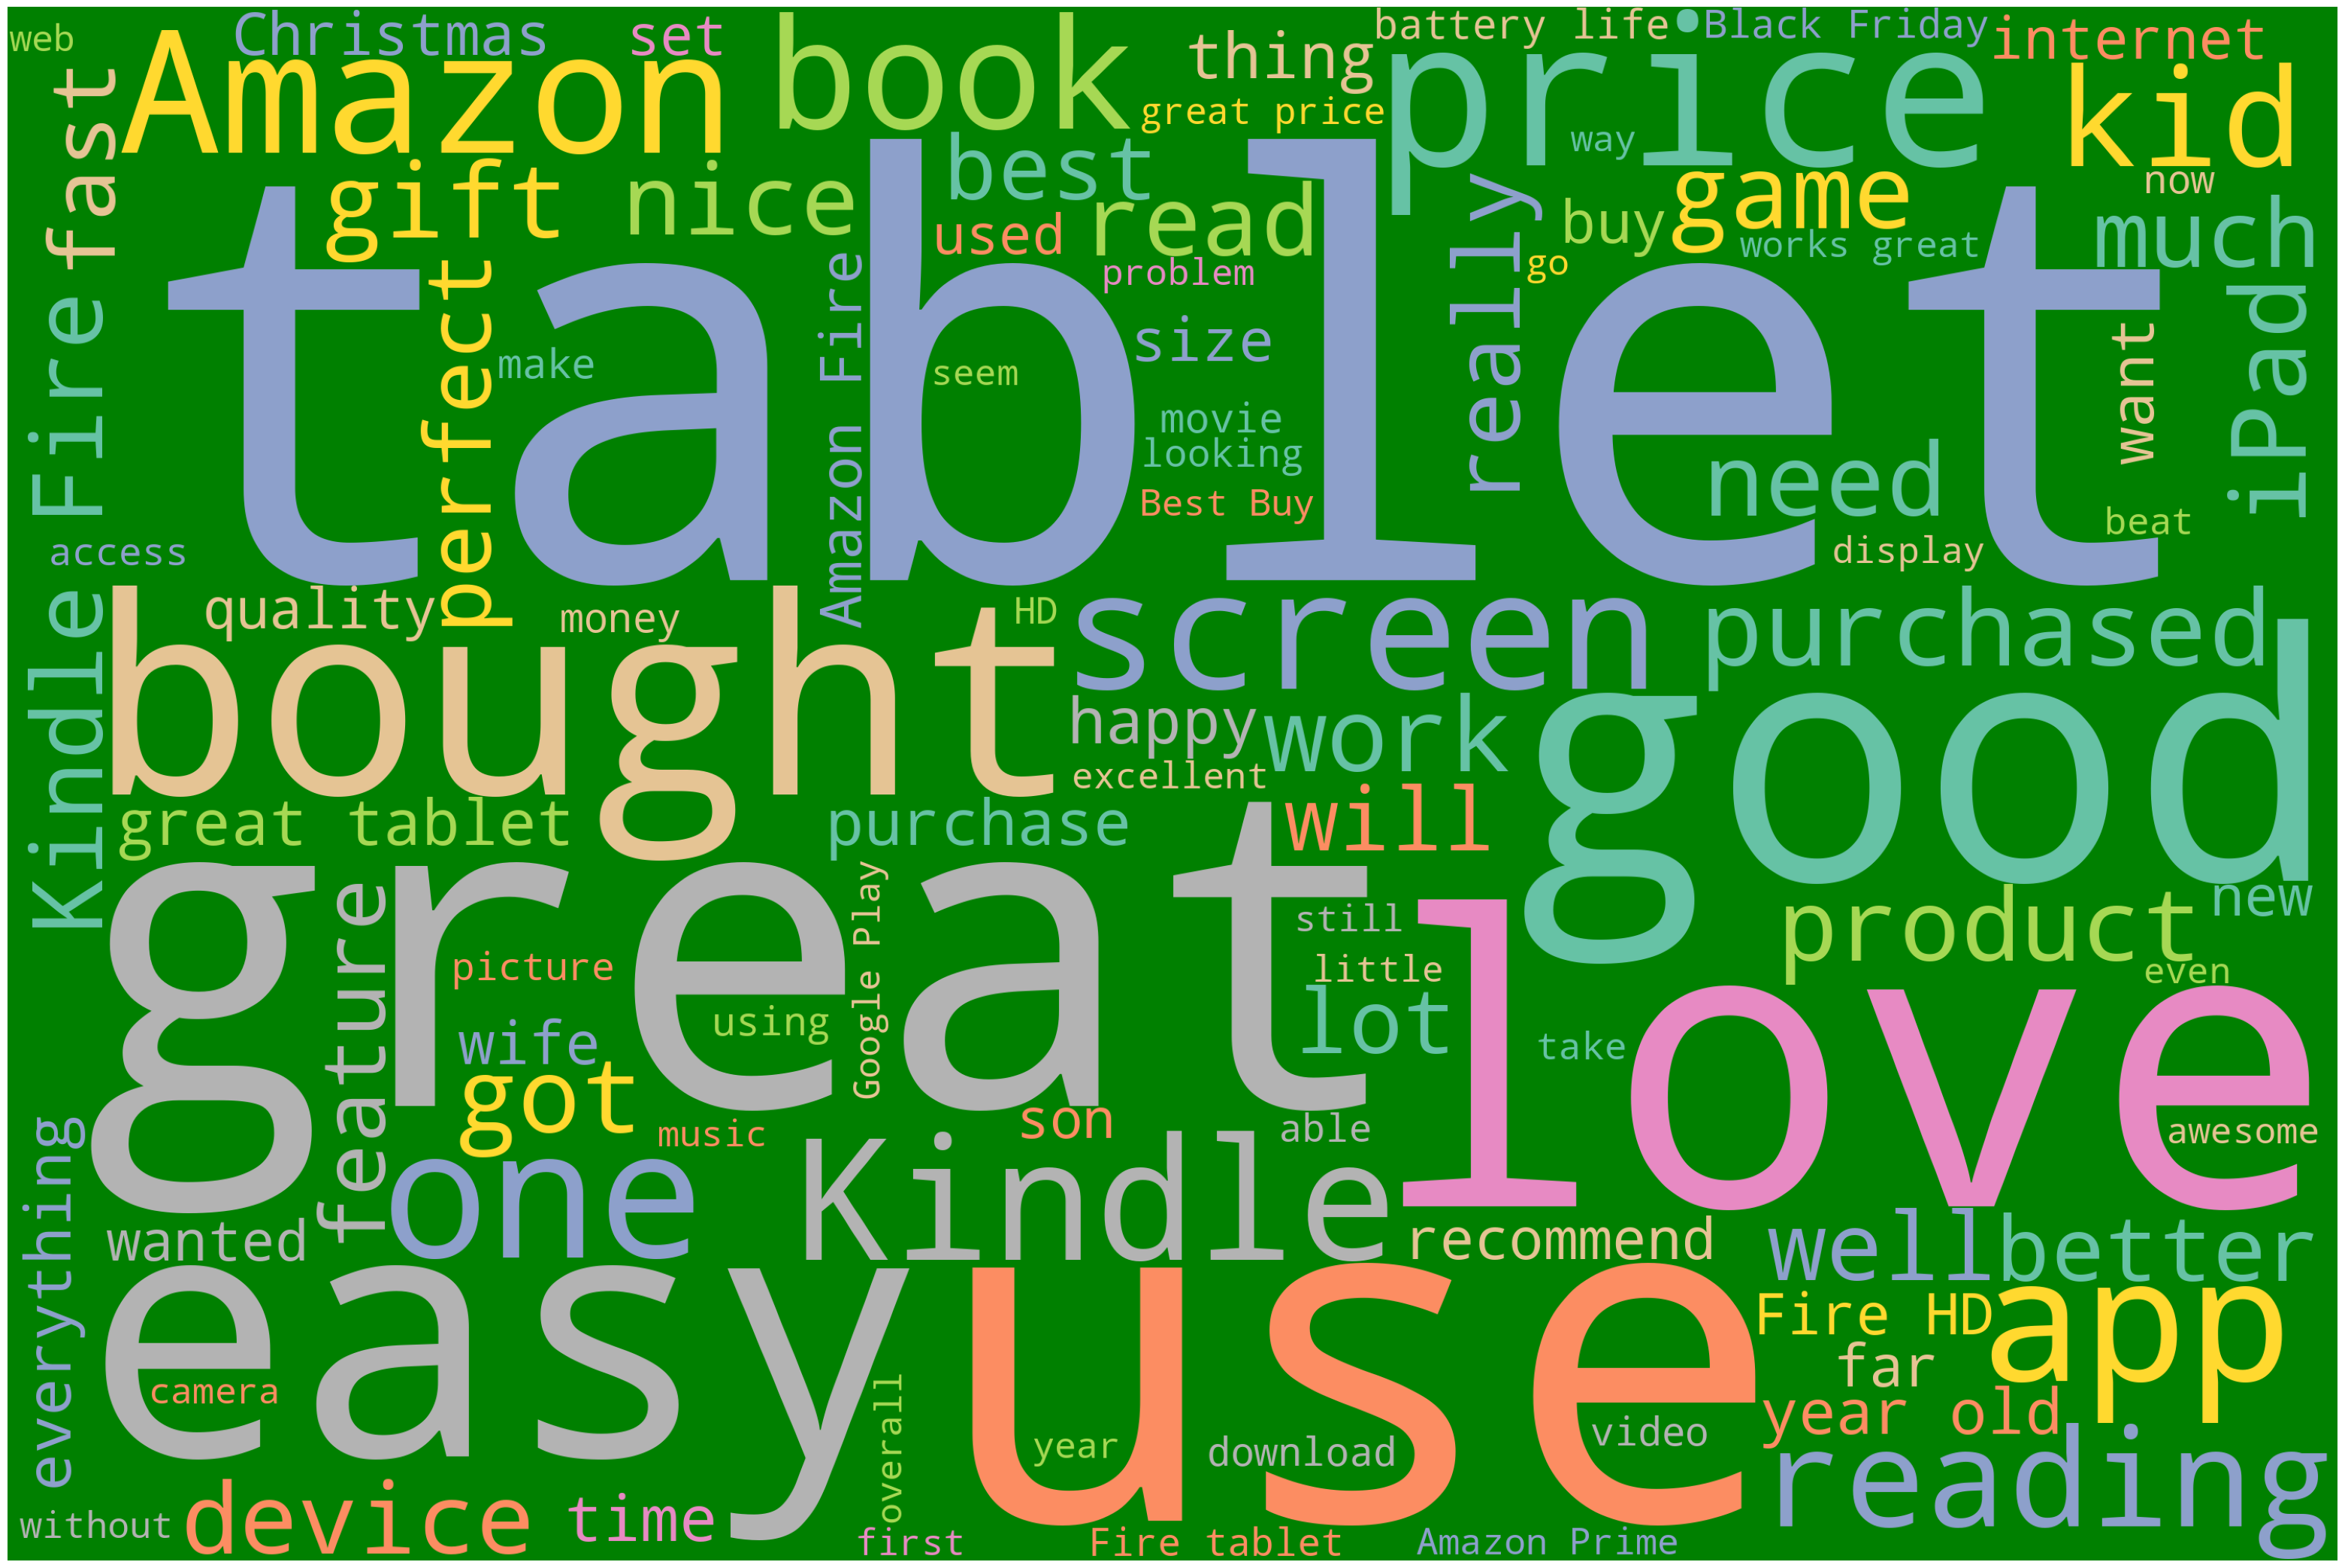

In [53]:
#plotcloud
plot_cloud(word_cloud)

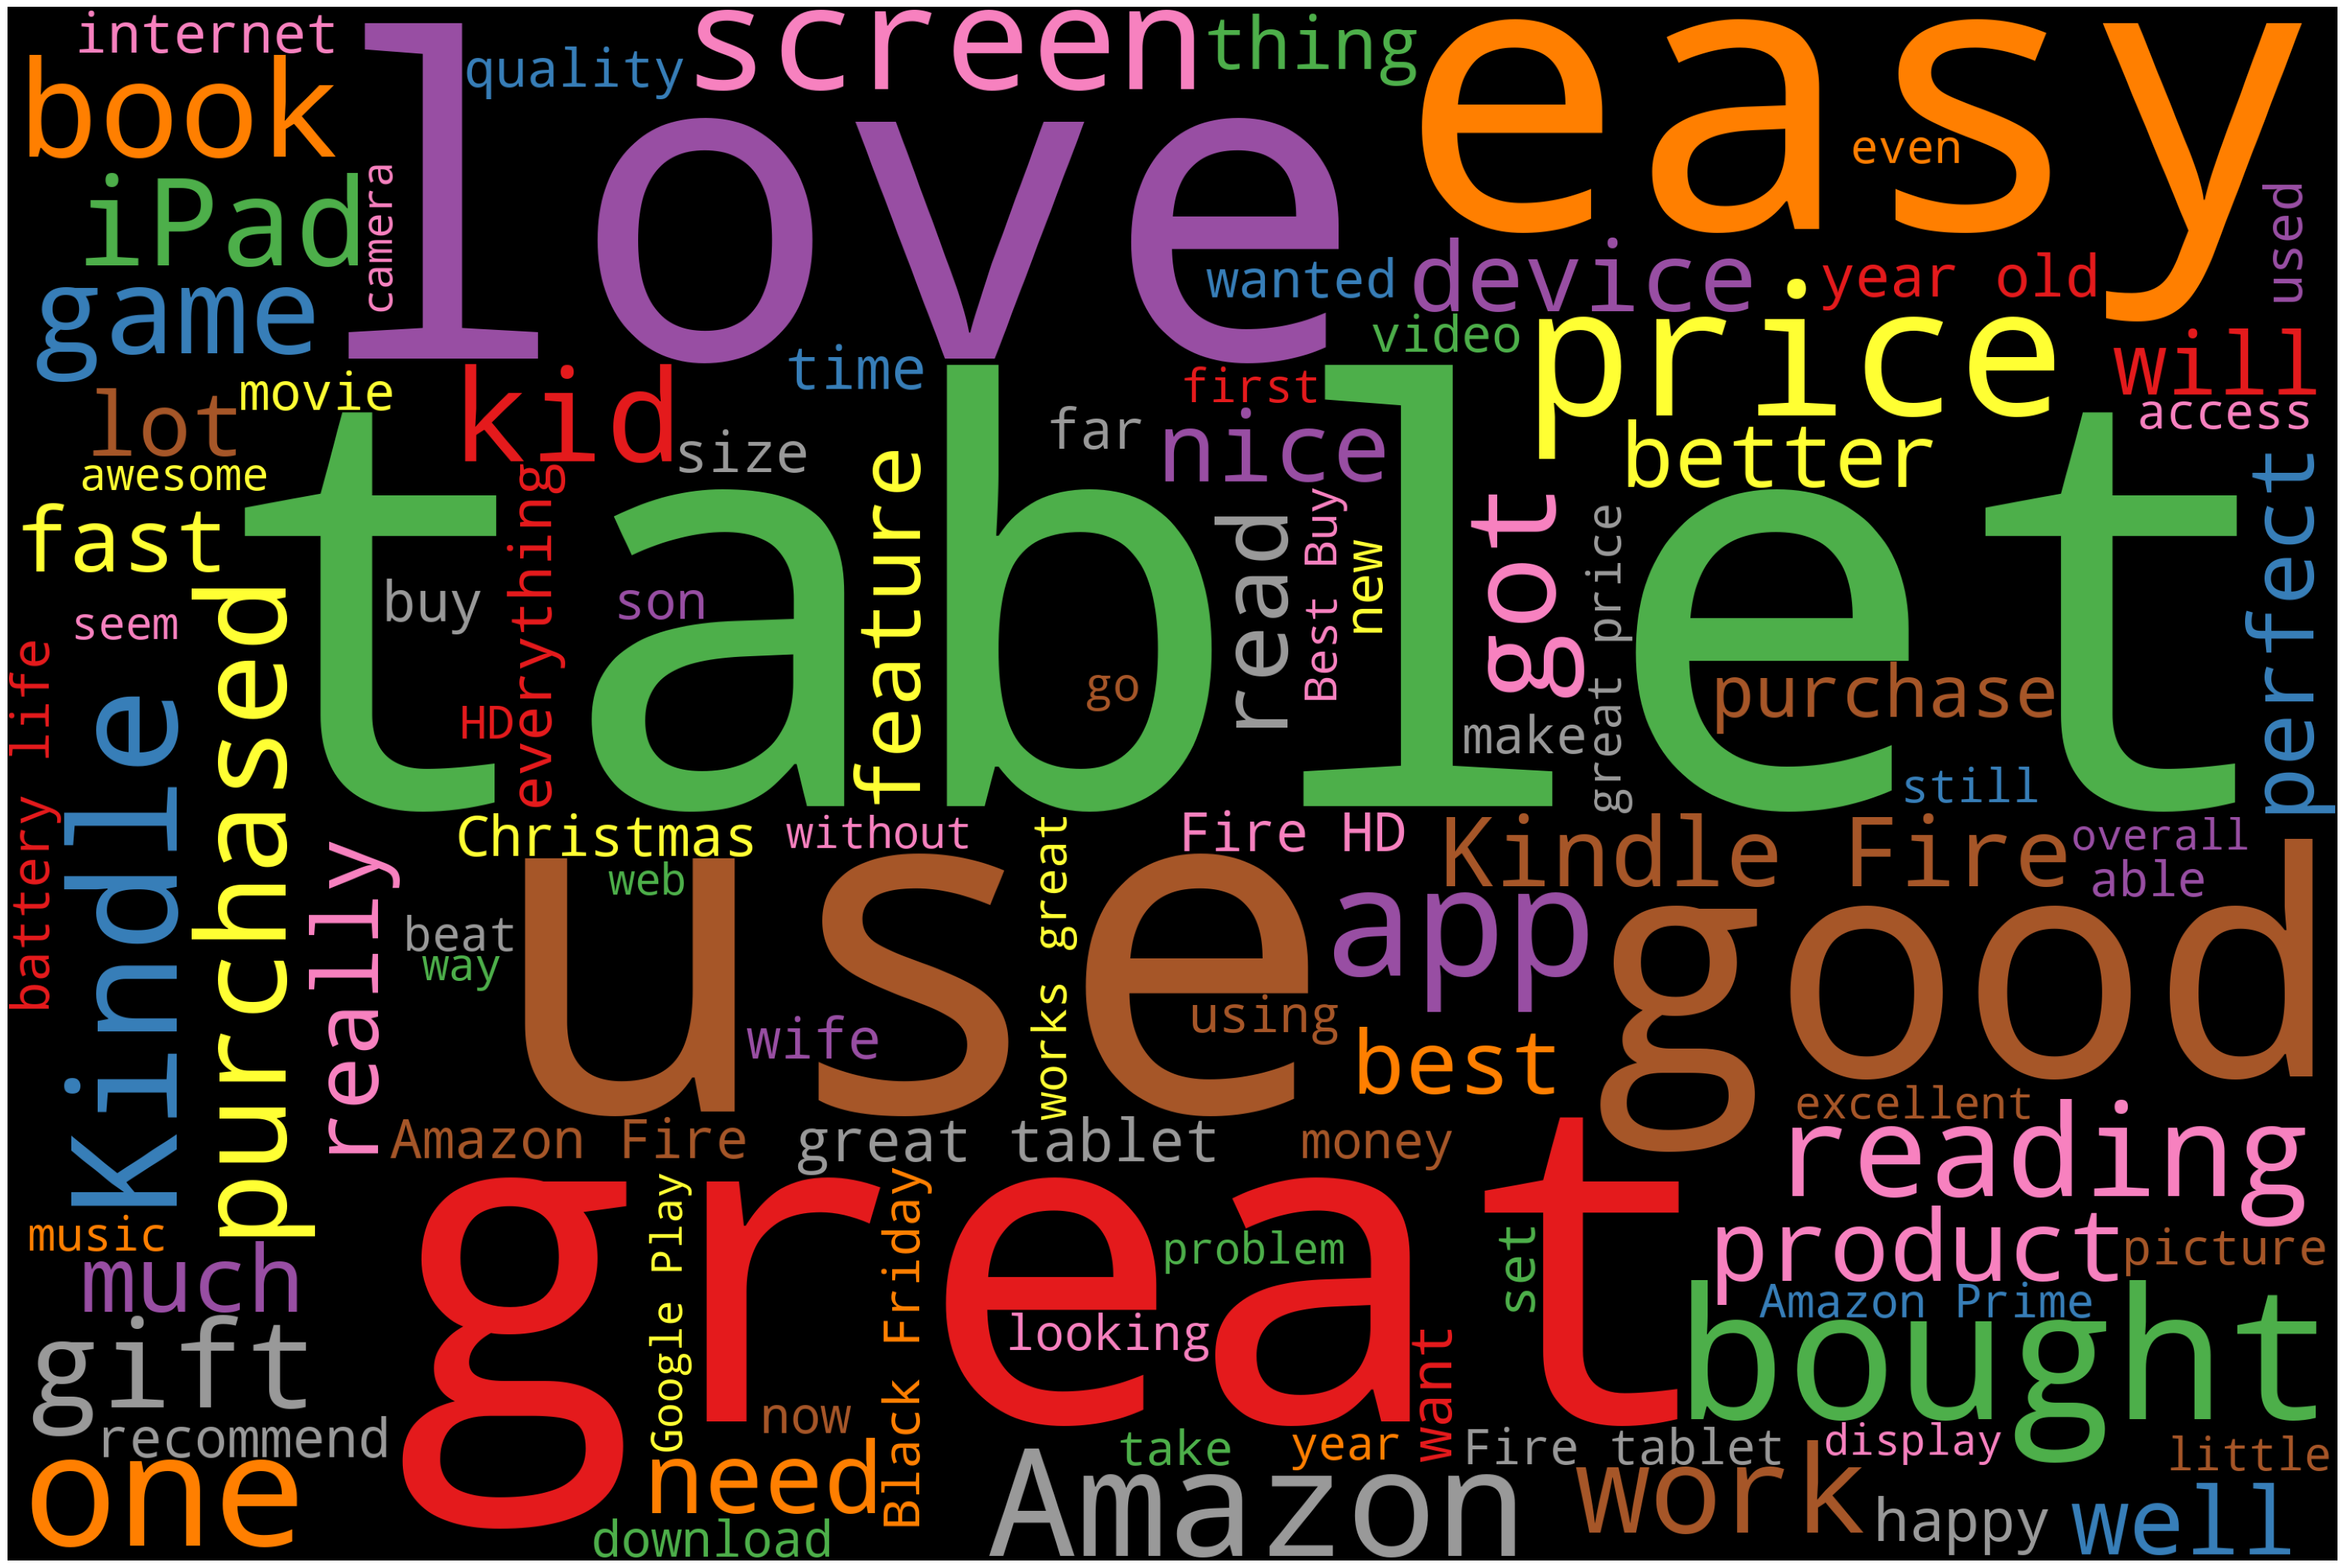

In [54]:
word_cloud=WordCloud(width=3000,height=2000,background_color='black',colormap='Set1',max_words=100).generate(text)
plot_cloud(word_cloud)

# **Named Entity Recognition**

In [55]:
#the data which is cleaned and which is free of punctuation is used.
#and we have done it in above. That  is stored in no_punc

In [56]:
no_punc

'This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with easegreat for beginner or experienced person Bought as a gift and she loves itInexpensive tablet for him to use and learn on step up from the NABI He was thrilled with it learn how to Skype on it alreadyIve had my Fire HD 8 two weeks now and I love it This tablet is a great valueWe are Prime Members and that is where this tablet SHINES I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing 900 base model The build on this fire is INSANELY AWESOME running at only 77mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur handsI bought this for my grand daughter when she comes over to visit I set it u

In [57]:
#Entity Tagging
nlp=spacy.load('en_core_web_sm')

In [58]:
one_block=no_punc
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [59]:
for token in doc_block[500:550]:
  print(token.pos_)

PROPN
NOUN
VERB
INTJ
PRON
ADP
DET
NOUN
CCONJ
VERB
DET
NOUN
ADP
DET
PROPN
NOUN
AUX
ADJ
PART
VERB
NOUN
CCONJ
VERB
ADV
ADJ
ADJ
NOUN
NOUN
ADV
ADJ
ADP
PRON
PRON
VERB
ADJ
PROPN
ADV
ADP
DET
NOUN
PRON
AUX
AUX
VERB
NUM
NOUN
CCONJ
ADV
PRON
VERB


In [60]:
for token in doc_block[500:550]:
  print(token,':',token.pos_)

youAnd : PROPN
silk : NOUN
works : VERB
wondersGot : INTJ
it : PRON
as : ADP
a : DET
present : NOUN
and : CCONJ
love : VERB
the : DET
size : NOUN
of : ADP
the : DET
screenThe : PROPN
kindle : NOUN
is : AUX
easiest : ADJ
to : PART
use : VERB
graphics : NOUN
and : CCONJ
screen : VERB
crisp : ADV
clear : ADJ
brilliant : ADJ
colorsnice : NOUN
reader : NOUN
almost : ADV
perfect : ADJ
for : ADP
what : PRON
i : PRON
wantneed : VERB
good : ADJ
bargainI : PROPN
really : ADV
like : ADP
this : DET
tablet : NOUN
I : PRON
would : AUX
have : AUX
given : VERB
5 : NUM
stars : NOUN
but : CCONJ
sometimes : ADV
you : PRON
have : VERB


In [61]:
#filtering noun and verb only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ['NOUN','VERB']]
nouns_verbs

['product',
 'disappointed',
 'children',
 'love',
 'use',
 'like',
 'ability',
 'monitor',
 'control',
 'content',
 'see',
 'easegreat',
 'beginner',
 'person',
 'Bought',
 'gift',
 'loves',
 'tablet',
 'use',
 'learn',
 'step',
 'learn',
 'weeks',
 'love',
 'tablet',
 'valueWe',
 'tablet',
 'love',
 'access',
 'content',
 'movies',
 'download',
 'watch',
 'has',
 'screen',
 'has',
 'look',
 'infact',
 'ipad',
 'costing',
 'base',
 'model',
 'build',
 'fire',
 'running',
 'mm',
 'feel',
 'back',
 'hold',
 'tab',
 'bought',
 'daughter',
 'comes',
 'visit',
 'set',
 'user',
 'entered',
 'age',
 'name',
 'makes',
 'accesses',
 'sites',
 'content',
 'age',
 'do',
 'loves',
 'capabilities',
 'bought',
 'installed',
 'SD',
 'card',
 'gives',
 'tablet',
 'plenty',
 'storage',
 'price',
 'think',
 'tablet',
 'spend',
 'hundreds',
 'dollars',
 'speed',
 'capacity',
 'comes',
 'basics',
 'tablets',
 'does',
 'people',
 'need',
 'fraction',
 'amazon',
 'fire',
 'inch',
 'tablet',
 'size',
 'purc

In [62]:
cv=CountVectorizer()
fit=cv.fit_transform(nouns_verbs)
sum_words=fit.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','counts']
wd_df[0:10]

words  counts
0   tablet    1054
1      use     527
2    price     400
3     love     306
4   screen     296
5   bought     278
6     have     266
7     apps     216
8    loves     197
9  reading     197

<Axes: title={'center': 'Top 10 noun and verb'}, xlabel='words'>

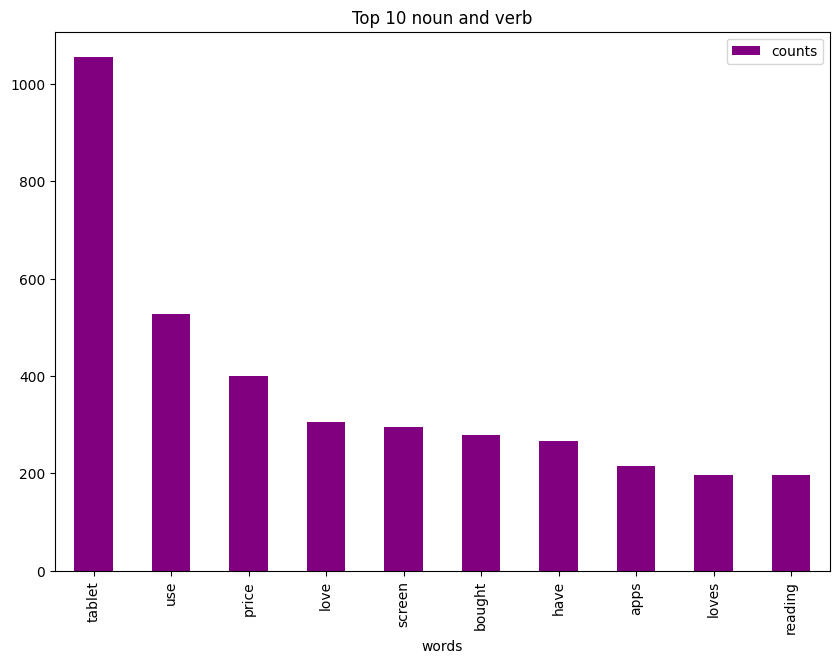

In [63]:
#barplot for top 10 noun and verb
wd_df[0:10].plot.bar(x='words',figsize=(10,7),title='Top 10 noun and verb',color='purple')

# **Emotional Mining**

In [64]:
#import afinn ductionary
afinn=pd.read_csv('Afinn.csv',encoding='latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [65]:
#import amazon dataset
amazon2=pd.read_excel('Amazon_review data.xlsx')
amazon2.drop(['Unnamed: 0','reviews.rating','reviews.title'],axis=1,inplace=True)
amazon2.rename(columns={'reviews.text':'review'},inplace=True)

In [66]:
amazon2

review
0     This product so far has not disappointed. My c...
1     great for beginner or experienced person. Boug...
2     Inexpensive tablet for him to use and learn on...
3     I've had my Fire HD 8 two weeks now and I love...
4     I bought this for my grand daughter when she c...
...                                                 ...
2496  This little $60 tablet is really good for read...
2497  My Hulu plays perfectly..great volume. Kindle ...
2498  Nice size screen, clear and clean picture with...
2499  I bought two of these kindles. One for my pret...
2500  This replaced my old original kindle fire. Wha...

[2501 rows x 1 columns]

In [67]:
amazon2=[review.strip() for review in amazon2.review]
amazon2=[review for review in amazon2 if review]
amazon2[25:45]

['I purchased this when my last tablet died. It meets all basic needs and the price was great.',
 'Perfect for downloading and reading books !! Perfect size and has a nice, bright screen.',
 "I was surprised when I learned of the capabilities of this device. Now my husband has more access to his desktop and I am doing things which I couldn't on his device.",
 'I got it for my son. Its user friendly and durable.',
 'The visual quality on the Fire 8 HD is amazing. It runs very fast and is easy to use, very durable.',
 'If your looking for a affordable gift this is it!.',
 'This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.',
 'Works great. Love the portability of books. Overall great product',
 'I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.',
 'Just the right size for reading books and playing some games.',
 "I love everything about this tablet

In [68]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences=tokenize.sent_tokenize(''.join(amazon2))
sentences[25:45]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I wish Amazon would pre install the play store, this would have been perfect.Preloaded with the reading app from Kindle but expandable with other apps.',
 'Perfect for travel.',
 'Carry your library, games and productivity apps in a small footprint.Very happy with this product and easy to use..picture is clear, takes great pictures..My grandchildren are home schooled and utilize the tables for many learning apps!',
 'They LOVE using them as it makes them feel "so grown up"!',
 'The tablets are a great leaning tool and they are receiving many benefits from them!Great size, easy to carry for traveling.',
 'Need to spend more time Looking into apps for contact manegement, interactive calenders and most important, music storage and use.I purchased this when my last tablet died.',
 'It meets all basic needs and the price was great.Perfect for downloading and reading books !',
 '!',
 'Perfect size and has a nice, bright screen.I was surprised when I learned of the capabilities of this devi

In [69]:
sent_df=pd.DataFrame(sentences,columns=['sentences'])
sent_df

sentences
0             This product so far has not disappointed.
1     My children love to use it and I like the abil...
2     Bought as a gift and she loves itInexpensive t...
3     He was thrilled with it, learn how to Skype on...
4     This tablet is a great value.We are Prime Memb...
...                                                 ...
3933  One for my preteen granddaughter whom had no p...
3934  However, My senior mother found that the touch...
3935  As a first time user on the kindle fire my mom...
3936  However, my tech savvy granddaughter loves her...
3937                              What a great upgrade.

[3938 rows x 1 columns]

In [70]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [71]:
sentiment_lexicon=affinity_scores

In [72]:
#def sentiment_analysis
def calculate_sentiment(text:str=None):
  sent_scores=0
  if text:
    sentences=nlp(text)
    print(sentences)
    for word in sentences:
      sent_scores+=sentiment_lexicon.get(word.lemma_,0)
  return sent_scores

# **Testing with different words**

In [73]:
calculate_sentiment(text='confident')

confident


2

In [74]:
calculate_sentiment(text='angry')

angry


-3

In [75]:
calculate_sentiment(text='Raj is very confident and lucky')

Raj is very confident and lucky


5

In [76]:
#applying sentiment_values on complete calculate_sentiment
sent_df['sentiment_values']=sent_df['sentences'].apply(calculate_sentiment)

This product so far has not disappointed.
My children love to use it and I like the ability to monitor control what content they see with ease.great for beginner or experienced person.
Bought as a gift and she loves itInexpensive tablet for him to use and learn on, step up from the NABI.
He was thrilled with it, learn how to Skype on it already...I've had my Fire HD 8 two weeks now and I love it.
This tablet is a great value.We are Prime Members and that is where this tablet SHINES.
I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model.
The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.I bought this for my grand daughter when she comes over to

In [77]:
sent_df.sort_values(by='sentiment_values').head(10)

sentences  sentiment_values
1771  That Samsung tab lagged a lot but I haven't se...                -7
863   I purchased the fire HD 8 and exchanged n pay ...                -5
81    The worst thing is that my steals it all the t...                -5
3584  Despite the relatively much lower price, I was...                -5
3129  I was disappointed that it did not come with e...                -5
1210  Then a day would pass and I'd be trying to typ...                -5
2443  The handy-dandy case that I found on sale for ...                -4
537   I actually bought the kids fire kindle and bou...                -4
3708  If you're looking for an affordable tablet tha...                -4
3492  I loathe even more that I would have had to pa...                -4

In [78]:
sent_df.sort_values(by='sentiment_values').tail(10)

sentences  sentiment_values
1649  It's a great Alertanative to an iPad... great ...                19
42    Love it!Overall a nice product for traveling p...                20
185   !my kids enjoy the Fire HD and they love the p...                21
2272  I have been happy with this new version.Great ...                21
3916  Combined with a great discount at Best Buy and...                22
24    I would have given 5 stars but sometimes you h...                24
3923  The price was just right.My daughter loves her...                24
312   I think it can do a lot for the price.Nice pri...                26
1203  Tablet is a good size and weight, and easy to ...                27
2303  Great storage, fantastic resolution and really...                29

In [79]:
#describe the sentiment scores for all review
sent_df['sentiment_values'].describe()

count    3938.000000
mean        2.829863
std         3.508906
min        -7.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        29.000000
Name: sentiment_values, dtype: float64

In [80]:
sent_df.shape

(3938, 2)

In [81]:
sent_df[sent_df['sentiment_values']>20]

sentences  sentiment_values
24    I would have given 5 stars but sometimes you h...                24
185   !my kids enjoy the Fire HD and they love the p...                21
312   I think it can do a lot for the price.Nice pri...                26
1203  Tablet is a good size and weight, and easy to ...                27
2272  I have been happy with this new version.Great ...                21
2303  Great storage, fantastic resolution and really...                29
3916  Combined with a great discount at Best Buy and...                22
3923  The price was just right.My daughter loves her...                24

In [82]:
sent_df[sent_df['sentiment_values']<-4]

sentences  sentiment_values
81    The worst thing is that my steals it all the t...                -5
863   I purchased the fire HD 8 and exchanged n pay ...                -5
1210  Then a day would pass and I'd be trying to typ...                -5
1771  That Samsung tab lagged a lot but I haven't se...                -7
3129  I was disappointed that it did not come with e...                -5
3584  Despite the relatively much lower price, I was...                -5

In [83]:
sent_df[sent_df['sentiment_values']>0]['sentences'].tolist()[7]

'You can spend hundreds of dollars more for additional speed and capacity but when it comes to the basics this tablets does everything that most people will ever need at a fraction of the cost.This amazon fire 8 inch tablet is the perfect size.'

In [84]:
sent_df[sent_df['sentiment_values']<0]['sentences'].tolist()[7]

'The worst thing is that my steals it all the time.'

In [85]:
#creating index
sent_df['index']=range(0,len(sent_df))

In [86]:
sent_df=sent_df.iloc[:,[2,0,1]]

In [87]:
sent_df

index                                          sentences  \
0         0          This product so far has not disappointed.   
1         1  My children love to use it and I like the abil...   
2         2  Bought as a gift and she loves itInexpensive t...   
3         3  He was thrilled with it, learn how to Skype on...   
4         4  This tablet is a great value.We are Prime Memb...   
...     ...                                                ...   
3933   3933  One for my preteen granddaughter whom had no p...   
3934   3934  However, My senior mother found that the touch...   
3935   3935  As a first time user on the kindle fire my mom...   
3936   3936  However, my tech savvy granddaughter loves her...   
3937   3937                              What a great upgrade.   

      sentiment_values  
0                   -2  
1                    7  
2                    5  
3                    8  
4                    3  
...                ...  
3933                -3  
3934                -1  
3935                -2  
3936                 1  
3937                 3  

[3938 rows x 3 columns]

# **Visualization**

# **Displot Visualization**

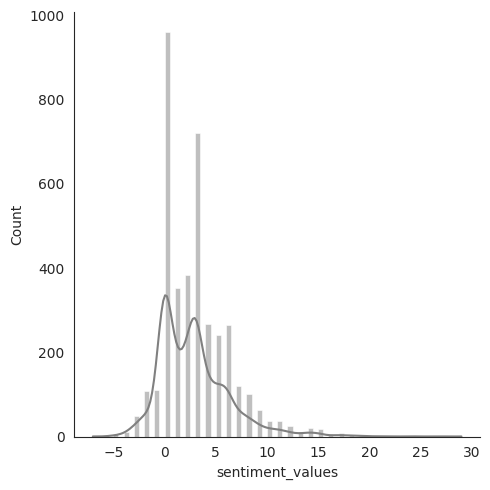

In [88]:
#distplot
sns.set_style(style='white')
sns.displot(x='sentiment_values',data=sent_df,kde=True,color='gray')
plt.show()

# **Scatterplot Visualization**

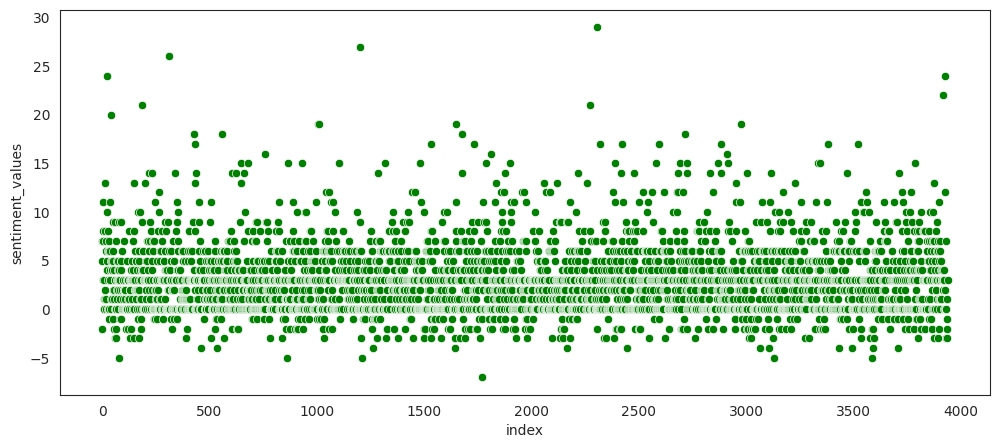

In [89]:
#Scatterplot
plt.figure(figsize=(12,5))
sns.scatterplot(x='index',y='sentiment_values',data=sent_df,color='green')
plt.show()

# **Lineplot Visualization**

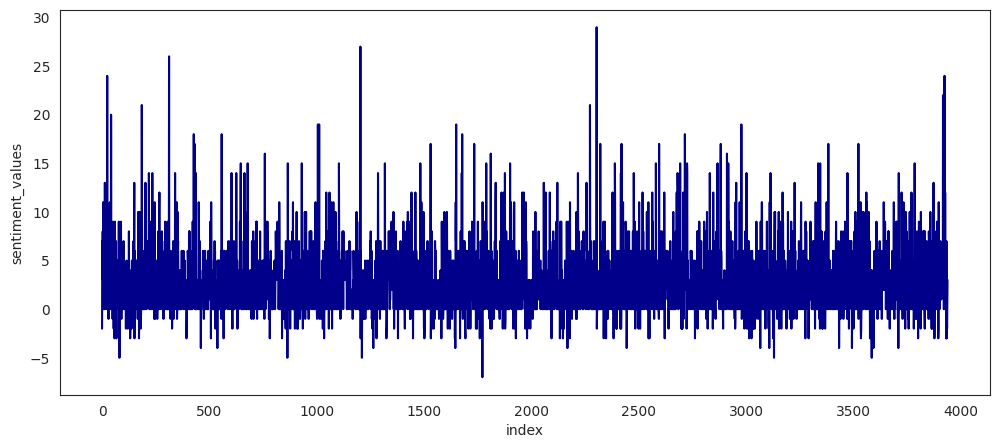

In [90]:
#lineplot
plt.figure(figsize=(12,5))
sns.lineplot(x='index',y='sentiment_values',data=sent_df,color='darkblue')
plt.show()

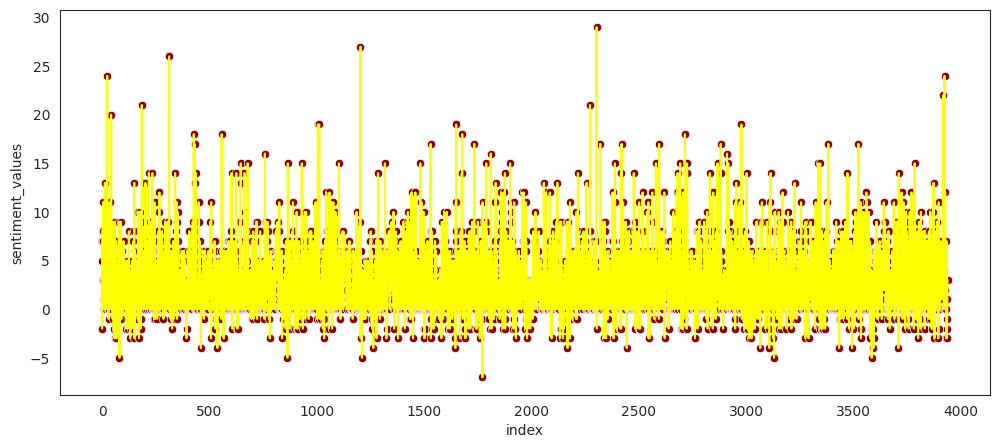

In [91]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='index',y='sentiment_values',data=sent_df,color='darkred')
sns.lineplot(x='index',y='sentiment_values',data=sent_df,color='yellow')
plt.show()

# **Checking the Sentiment**

In [92]:
#checking whether it is positive score or negative score or neutral score
def analysis(scores):
  if scores<0:
    return "Negative"
  elif scores==0:
    return "Neutral"
  if scores>0:
    return "Positive"

sent_df['analysis_scores']=sent_df['sentiment_values'].apply(analysis)

In [93]:
sent_df

index                                          sentences  \
0         0          This product so far has not disappointed.   
1         1  My children love to use it and I like the abil...   
2         2  Bought as a gift and she loves itInexpensive t...   
3         3  He was thrilled with it, learn how to Skype on...   
4         4  This tablet is a great value.We are Prime Memb...   
...     ...                                                ...   
3933   3933  One for my preteen granddaughter whom had no p...   
3934   3934  However, My senior mother found that the touch...   
3935   3935  As a first time user on the kindle fire my mom...   
3936   3936  However, my tech savvy granddaughter loves her...   
3937   3937                              What a great upgrade.   

      sentiment_values analysis_scores  
0                   -2        Negative  
1                    7        Positive  
2                    5        Positive  
3                    8        Positive  
4                    3        Positive  
...                ...             ...  
3933                -3        Negative  
3934                -1        Negative  
3935                -2        Negative  
3936                 1        Positive  
3937                 3        Positive  

[3938 rows x 4 columns]

In [94]:
#determine review sentiment by using value_counts

In [95]:
sent_df['analysis_scores'].value_counts()

Positive    2691
Neutral      961
Negative     286
Name: analysis_scores, dtype: int64

# **Conclusion**

In [96]:
#After value count we get to know that,
#So here Positive value have high score.
#The Data is consider as Positive sentiment.
#So we can conclude that, the Sentiment of the above amazon review data has Positive Sentiment

In [97]:
# The amazon review data has a Positive Sentiment

# **So amazon review data has Positive Sentiment**

In [98]:
#completed

# **Completed**